# Introduction

Here I want to compute the n-cover times. For my taxi-trip process, as well as the random walk. For N = 1, i expect the random walk to win. I'm hoping that for n > 2, the taxi-trip will do better.

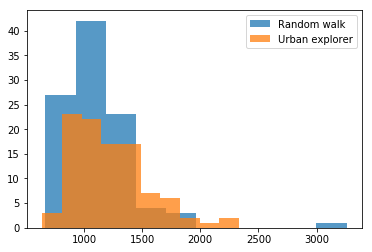

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

N,k = 100, 2
G = nx.barabasi_albert_graph(N,k)

num_trials, n = 100, 1
Ts_rw = f.random_walk_covertime(G,n,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,n,num_trials=num_trials)
plt.hist(Ts_rw, alpha=0.75);plt.hist(Ts_ue,alpha=0.75);plt.legend(['Random walk','Urban explorer'])
#np.savetxt('data/covertimes_SF_random_walker.txt',Ts_rw)
#np.savetxt('data/covertimes_SF_urban_explorer.txt', Ts_ue)

## Vary N

finished N = 5
finished N = 15
finished N = 25
finished N = 35
finished N = 45
finished N = 55
finished N = 65
finished N = 75
finished N = 85
finished N = 95
finished N = 105
finished N = 115
finished N = 125
finished N = 135
finished N = 145
finished N = 155
finished N = 165
finished N = 175
finished N = 185
finished N = 195


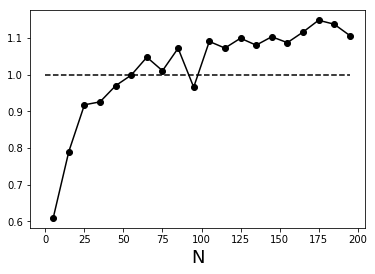

In [14]:
meanTratios = []
Ns = range(5,200,10)
m = 1

for N in Ns:
    num_trials = 1000

    k = 2
    G = nx.barabasi_albert_graph(N,k)
    
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

In [9]:
meanTratios = []
Ns = [10,100,500,1000,5000]
m = 1

for N in Ns:
    num_trials = 1000

    k = 2
    G = nx.barabasi_albert_graph(N,k)
    
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

finished N = 10
finished N = 100
finished N = 500
finished N = 1000


KeyboardInterrupt: 

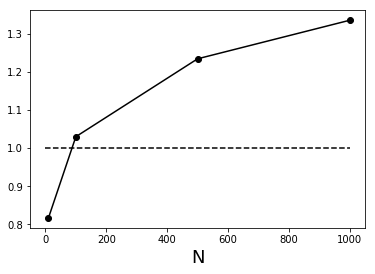

In [11]:
plt.plot(Ns[:-1],meanTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns[:-1]),linestyles='dashed')

finished N = 10
finished N = 50
finished N = 100
finished N = 200
finished N = 300
finished N = 500
finished N = 800
finished N = 1000
finished N = 10
finished N = 50
finished N = 100
finished N = 200
finished N = 300
finished N = 500
finished N = 800
finished N = 1000
finished N = 10
finished N = 50
finished N = 100
finished N = 200
finished N = 300
finished N = 500
finished N = 800
finished N = 1000


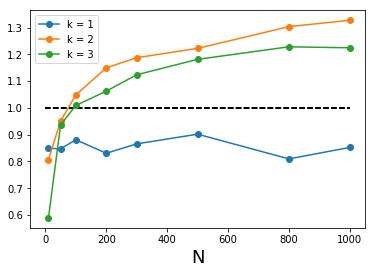

In [3]:
ks = [1,2,3]

for k in ks:
    meanTratios = []
    Ns = [10,50,100,200,300,500,800,1000]
    m = 1

    for N in Ns:
        num_trials = 2000
        G = nx.barabasi_albert_graph(N,k)
        Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
        Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
        meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
        print 'finished N = ' + str(N)
    plt.plot(Ns,meanTratios,'o-')
    np.savetxt('data/mean_cover_time_ratio_SF_k_' + str(k)+'.txt',meanTratios)
    plt.xlabel('N',fontsize=18)
    #plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
    plt.hlines(1,0,max(Ns),linestyles='dashed')
    
np.savetxt('data/mean_cover_time_ratio_SF_Ns.txt',Ns)
plt.legend(['k = ' +str(i) for i in ks])
#plt.savefig('figures/2dpar_plot_SF.png')

### Two parameters

In [27]:
Ns = range(25,401,25)
ks = [1,2,3]
m = 1
data = np.zeros((len(ks),len(Ns)))

for row,k in enumerate(ks):
    for col,N in enumerate(Ns):
        num_trials = 100
        G = nx.barabasi_albert_graph(N,k)
        G = [c for c in nx.connected_component_subgraphs(G)][0]
        Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
        Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
        data[row][col] = np.mean(Ts_ue)/np.mean(Ts_rw)
        #print 'finished N = ' + str(N)

KeyboardInterrupt: 

### Startionary densities

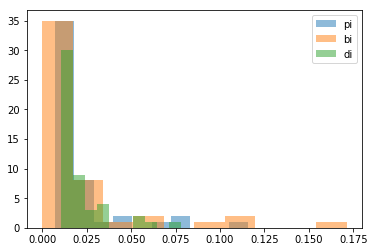

In [3]:
#Make graph
N,k = 50, 2
G = nx.barabasi_albert_graph(N,k)
G = [c for c in nx.connected_component_subgraphs(G)][0]

#Run U.E.
N = G.number_of_nodes()
counts = np.zeros(N)
T = 5*10**6
counts = f.urban_explorer_stationary_densities(G,counts,T)
counts = counts / sum(counts)

#Find betweenness
bs = nx.betweenness_centrality(G).values()
bs = np.array(bs) / sum(bs)

#Find degree
ds = np.array([d for n, d in G.degree()])
ds = ds / (1.0*sum(ds))

plt.hist(counts,alpha=0.5)
plt.hist(bs,alpha=0.5)
plt.hist(ds,alpha=0.5)
plt.legend(['pi','bi','di'])

np.savetxt('data/bs_SF.txt',bs)
np.savetxt('data/ds_SF.txt',ds)
np.savetxt('data/ps_SF.txt',counts)

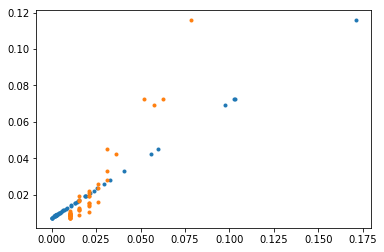

In [4]:
plt.plot(bs,counts,'.')
plt.plot(ds,counts,'.')

### m-cover time

In [ ]:
from multiprocessing import Pool

N,m = 500, 5
ms = range(1,10,2)
G = nx.bar(N,p)
G = [c for c in nx.connected_component_subgraphs(G)][0]

def func(m):
    num_trials = 100
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    return np.mean(Ts_ue)/np.mean(Ts_rw)

workers = Pool(5)
data = workers.map(func,ms)
plt.plot(ms,data,'ko-')
plt.xlabel('m', fontsize=18)
plt.hlines(1,0,max(ms),linestyles='dashed')